In [1]:
import numpy
import py_entropy
from matplotlib import pyplot

# 2D lattice connections

In [2]:
l = 20

hxs = numpy.arange(0,l//2)
hys = numpy.arange(0,l//2)
xs = numpy.arange(0,l)
ys = numpy.arange(0,l)
connections = []

for hx in hxs:
    x = 2*hx
    for y in ys:
        aindex = y*l + x
        if x < l-1:
            bindex = y*l + (x+1)
            connections.append((aindex,bindex))

for hx in hxs:
    x = 2*hx + 1
    for y in ys:
        aindex = y*l + x
        if x < l-1:
            bindex = y*l + (x+1)
            connections.append((aindex,bindex))

for hy in hys:
    y = 2*hy
    for x in xs:
        aindex = y*l + x
        if y < l-1:
            bindex = (y+1)*l + x
            connections.append((aindex,bindex))

for hy in hys:
    y = 2*hy + 1
    for x in xs:
        aindex = y*l + x
        if y < l-1:
            bindex = (y+1)*l + x
            connections.append((aindex,bindex))
            
len(connections)

760

# Check timings + precompute size

First for single threaded then multithreaded

In [3]:
g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=False, num_experiments=16, layer=connections)
size = g.get_precompute_size()
no_pre_time = %timeit -o g.apply_layer()

g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=False, num_experiments=16, layer=connections)
g.precompute_connections()
pre_time = %timeit -o g.apply_layer()

print(size)

606 ms ± 47.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
253 ms ± 22.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8576016


In [4]:
g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=True, num_experiments=16, layer=connections)
no_pre_time = %timeit -o g.apply_layer()

g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=True, num_experiments=16, layer=connections)
g.precompute_connections()
pre_time = %timeit -o g.apply_layer()

174 ms ± 8.57 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
158 ms ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Run simulation

In [5]:
g = py_entropy.GenericMultiDefectState(l, 1, [1,1], parallel_matrix_mul=True, num_experiments=16)
oned_purities = g.apply_layers_and_save_mean_purity(10 * l**2)
oned_states = g.get_states().shape[0]

In [6]:
g = py_entropy.GenericMultiDefectState(2*l, 1, [1,1], parallel_matrix_mul=True, num_experiments=16)
oned_perimeter_purities = g.apply_layers_and_save_mean_purity(10 * l**2)
oned_perimeter_states = g.get_states().shape[0]

In [7]:
g = py_entropy.GenericMultiDefectState(l**2, 1, [1,1], parallel_matrix_mul=True, num_experiments=16, layer=connections)
twod_purities = g.apply_layers_and_save_mean_purity(10 * l**2)
twod_states = g.get_states().shape[0]

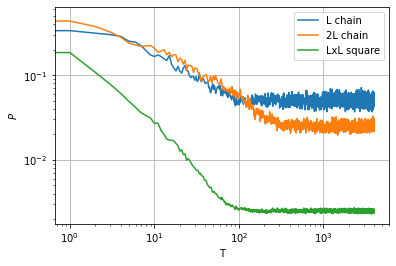

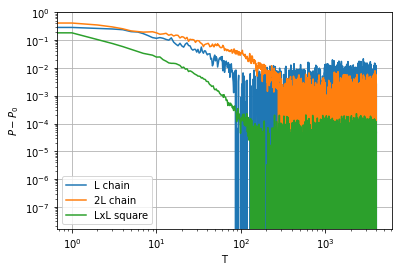

In [10]:
pyplot.plot(oned_purities, label='L chain')
pyplot.plot(oned_perimeter_purities, label='2L chain')
pyplot.plot(twod_purities, label='LxL square')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P$')
pyplot.legend()
pyplot.grid()
pyplot.show()

pyplot.plot(oned_purities - 1.0/oned_states, label='L chain')
pyplot.plot(oned_perimeter_purities - 1.0/oned_perimeter_states, label='2L chain')
pyplot.plot(twod_purities - 1.0/twod_states, label='LxL square')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.xlabel('T')
pyplot.ylabel('$P - P_0$')
pyplot.legend()
pyplot.grid()
pyplot.show()